In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [79]:
cd C:\Users\hello\data_learn

C:\Users\hello\data_learn


## EXPLORATION

In [5]:
df = pd.read_csv('netflix_titles.csv')


In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
#XEM THÔNG TIN CÁC CỘT TRONG DATA
raw_columns = df.columns
print(raw_columns,"\n")

raw_info = df.info()

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df[df.duplicated()]
#check co gia tri bi lap hay khong

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [9]:
#Checking Missing Values
missing_value_df = df.isnull().sum()
print(missing_value_df)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [10]:
#tỉ lệ phần trăm missing value trên mỗi cột
raw_percent_missing_value = 100*(missing_value_df / len(df.index))
percent_missing_value = round(raw_percent_missing_value,2)
print(percent_missing_value.sort_values(ascending=False))

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64


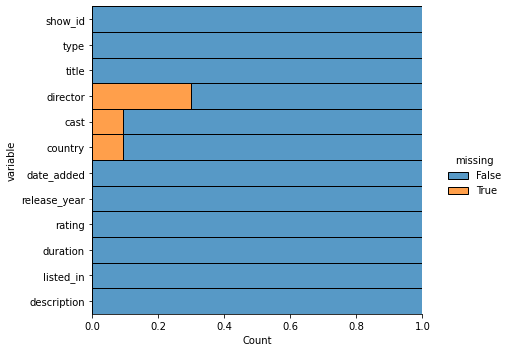

In [11]:
#visualiazation các biên missing
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)

## PREPARING

In [13]:
data = df.copy()

In [14]:
#Country được thay thế bằng giá trị xuất hiện nhiều trong cột
#Director thay bằng "No Data"
# Cast thay bằng "No Data"
#drop missing data khác
data['country'] = data['country'].fillna(data['country'].mode()[0])
data['cast'].replace(np.nan, 'No Data',inplace  = True)
data['director'].replace(np.nan, 'No Data',inplace  = True)
data.dropna(inplace=True)



In [15]:
data.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [16]:
data.shape
#check giảm bao nhiêu dòng sau khi ta drop missing value

(8790, 12)

In [17]:
#chuyển cột "date_added" về dạng "YYYY-MM-DD"
data['date_added'] = pd.to_datetime(data['date_added'])

#Sau đó chia cột thành ngày, tháng, năm riêng lẻ
data['month_added']=data['date_added'].dt.month
data['month_name_added']=data['date_added'].dt.month_name()
data['year_added'] = data['date_added'].dt.year

In [18]:
data.dtypes


show_id                     object
type                        object
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                    object
listed_in                   object
description                 object
month_added                  int64
month_name_added            object
year_added                   int64
dtype: object

In [19]:
#xem data sau khi chỉnh sửa
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021


## VISUALIZATION

In [20]:
#đếm số lượng show và phim được thêm vào từng năm trê netflix
data['year_added'].value_counts()

2019    2016
2020    1879
2018    1648
2021    1498
2017    1185
2016     426
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: year_added, dtype: int64

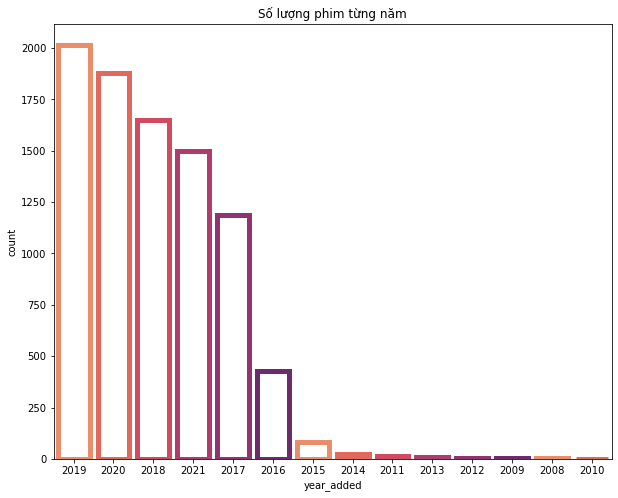

In [28]:
#Biểu đồ số lượng phim được thêm vào từng năm
plt.figure(figsize=(10,8))
plt.title('Số lượng phim từng năm')
sns.countplot(x='year_added',data=data,order=data['year_added'].value_counts().index[:],facecolor=(0,0,0,0),linewidth=5, edgecolor=sns.color_palette("flare"))
plt.show()

In [29]:
#Xem sự chênh lệch giữa movie và TV show trong tập dữ liệu
data.groupby('type').type.count()

type
Movie      6126
TV Show    2664
Name: type, dtype: int64

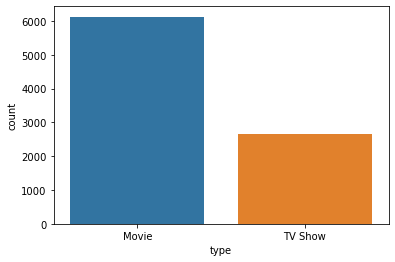

In [30]:
sns.countplot(x='type', data=data)
plt.show()


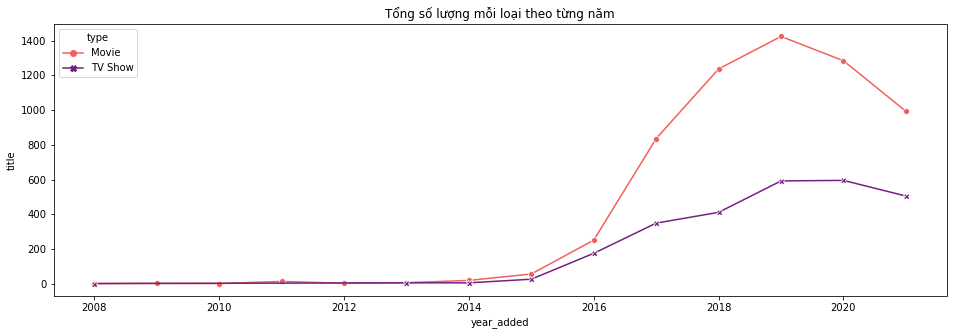

In [41]:
#tạo data set mới, gộp chung 'type' và 'year_added'
type_year = (data.groupby(['type','year_added'])['title'].size()).reset_index()

fig = plt.figure(figsize=(16,5))
 #Plot Properties (data use type_year from data.groupby type and yearadd)
sns.lineplot(data = type_year,x = 'year_added',y = 'title',hue = 'type',style = 'type',palette='magma_r',markers=True, dashes=False)
plt.title("Tổng số lượng mỗi loại theo từng năm")
plt.show()

In [44]:
# check 10 nước có số lượng movies và TV Show nhiều nhất 
data['country'].value_counts()[:10]

United States     3638
India              972
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

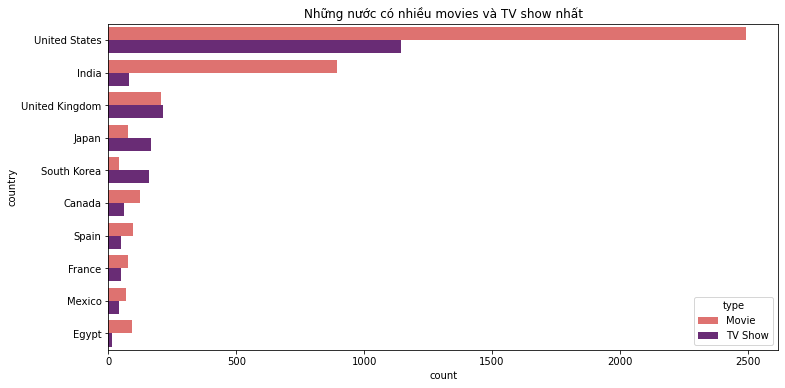

In [46]:
fig = plt.figure(figsize=(12,6))
sns.countplot(data = data,y = 'country', order = data["country"].value_counts().index[:10],hue = 'type',palette = 'magma_r')
plt.title("Những nước có nhiều movies và TV show nhất")
plt.show()

In [47]:
#Check thông tin về dạo diên
data['director'].value_counts()

No Data                           2621
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4527, dtype: int64

In [48]:
director = data[data.director!='No Data'].set_index('title').director.str.split(",",expand=True).stack().reset_index(level=1,drop=True)
director
# != 'No Data' để loại những dòng có 'No Data'
# .str.split(',',expand=True) để chia những dòng có 2 tác giả trở lên được ngăn cách bằng dấu ','

title
Dick Johnson Is Dead                Kirsten Johnson
Ganglands                           Julien Leclercq
Midnight Mass                         Mike Flanagan
My Little Pony: A New Generation      Robert Cullen
My Little Pony: A New Generation     José Luis Ucha
                                         ...       
Zinzana                             Majid Al Ansari
Zodiac                                David Fincher
Zombieland                          Ruben Fleischer
Zoom                                   Peter Hewitt
Zubaan                                  Mozez Singh
Length: 6974, dtype: object

In [49]:
#check lại data đã chuẩn chưa
director.value_counts()


Rajiv Chilaka       22
 Jan Suter          18
Raúl Campos         18
Marcus Raboy        16
Suhas Kadav         16
                    ..
Eric Bross           1
Will Eisenberg       1
Marina Seresesky     1
Kenny Leon           1
Mozez Singh          1
Length: 5118, dtype: int64

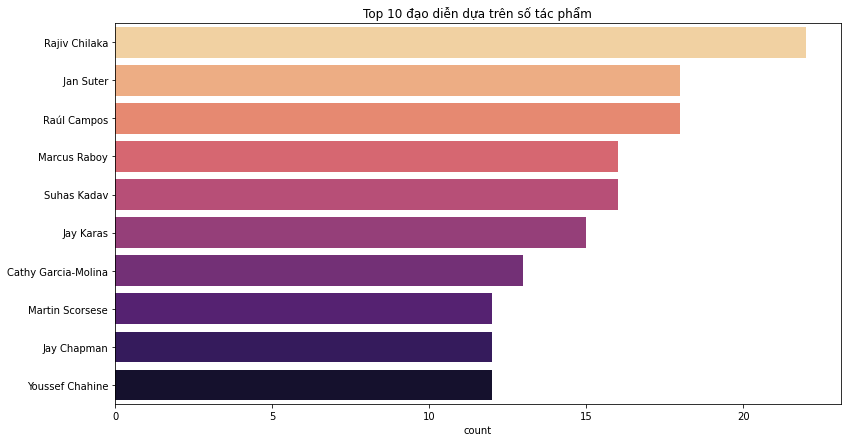

In [51]:
plt.figure(figsize=(13,7))
sns.countplot(y = director, order=director.value_counts().index[:10], palette='magma_r')
plt.title('Top 10 đạo diễn dựa trên số tác phẩm')
plt.show()

In [52]:
#phân tích về dữ liệu các diễn viên 

In [53]:
tv_shows = data[data.type == 'TV Show'].copy()
movie = data[data.type == 'Movie'].copy()

In [54]:
tv_shows['cast'].value_counts()

No Data                                                                                                                                                                                                                                                              350
David Attenborough                                                                                                                                                                                                                                                    14
Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson                                                                                                                                                                                              4
Dave Chappelle                                                                                                                                                                                               

In [56]:
movie['cast'].value_counts()

No Data                                                                                                                                                      475
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                       13
Samuel West                                                                                                                                                   10
Jeff Dunham                                                                                                                                                    7
Kevin Hart                                                                                                                                                     6
                                                                                                                                                            ... 
Oscar Martínez, Inma Cuesta, Mafal

In [65]:
#data của 'cast' bị giống cột 'director' nên ta áp dụng tương tự
cast_tv = tv_shows[tv_shows.cast!='No Data'].set_index('title').cast.str.split(",",expand=True).stack().reset_index(level=1,drop=True)
cast_m = movie[movie.cast!='No Data'].set_index('title').cast.str.split(",",expand=True).stack().reset_index(level=1,drop=True)

In [58]:
cast_tv.value_counts()

 Takahiro Sakurai      24
 Junichi Suwabe        17
 Yuki Kaji             17
 Ai Kayano             16
 Daisuke Ono           14
                       ..
Téa Leoni               1
 Bebe Neuwirth          1
 Zeljko Ivanek          1
 Erich Bergen           1
 Hina Khawaja Bayat     1
Length: 15437, dtype: int64

In [59]:
cast_m.value_counts()

 Anupam Kher              38
 Rupa Bhimani             27
 Om Puri                  27
Shah Rukh Khan            26
 Boman Irani              25
                          ..
 Hiyori Sakurada           1
 Mizuki Itagaki            1
 Shotaro Mamiya            1
Miona Hori                 1
 Chittaranjan Tripathy     1
Length: 27871, dtype: int64

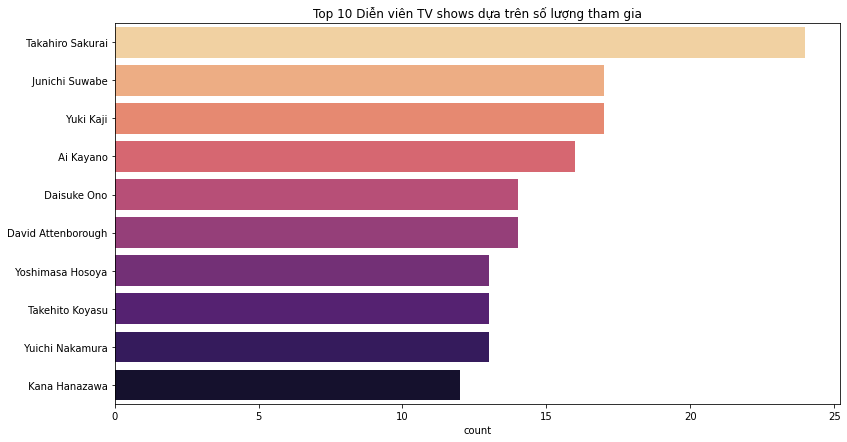

In [63]:
plt.figure(figsize=(13,7))
sns.countplot(y = cast_tv, order=cast_tv.value_counts().index[:10], palette='magma_r')
plt.title('Top 10 Diễn viên TV shows dựa trên số lượng tham gia')
plt.show()

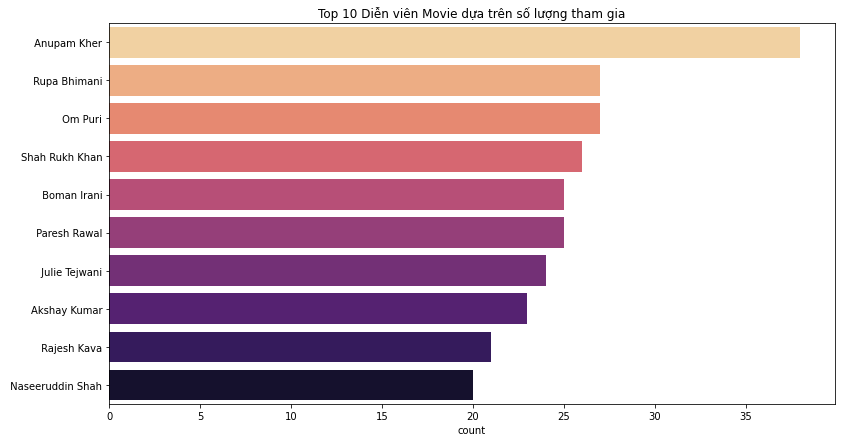

In [64]:
plt.figure(figsize=(13,7))
sns.countplot(y = cast_m, order=cast_m.value_counts().index[:10], palette='magma_r')
plt.title('Top 10 Diễn viên Movie dựa trên số lượng tham gia')
plt.show()

In [66]:
#Check Duration và Category 

In [67]:
movie['duration'].value_counts()


90 min     152
94 min     146
93 min     146
97 min     146
91 min     144
          ... 
212 min      1
8 min        1
186 min      1
193 min      1
191 min      1
Name: duration, Length: 205, dtype: int64

In [68]:
tv_shows['duration'].value_counts()

1 Season      1791
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
13 Seasons       2
15 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: duration, dtype: int64

In [69]:
#replace "min" bằng " "
movie['duration'] = movie['duration'].str.replace(' min','').astype(int)

In [70]:
tv_shows['duration']=tv_shows['duration'].str.split(' ').str[0]
tv_shows.rename(columns = {'duration':'season'}, inplace = True)

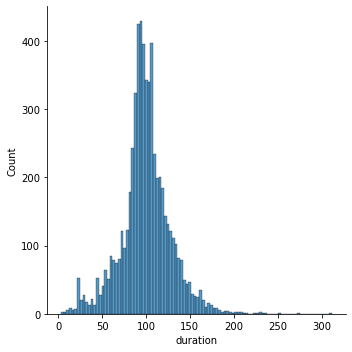

In [71]:
#Độ dài của các movies
sns.displot(data=movie,x='duration',bins=100)

<AxesSubplot:>

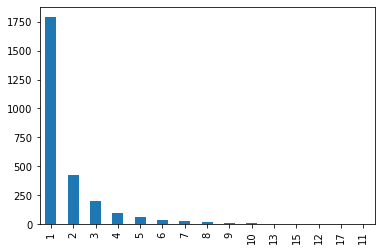

In [72]:
# Số Season của các TV Show
tv_shows['season'].value_counts().plot(kind='bar')

In [73]:
#Check các thể loại của tv shows và movies
genre = data.set_index('title').listed_in.str.split(",",expand=True).stack().reset_index(level=1,drop=True)
genre.head()

title
Dick Johnson Is Dead             Documentaries
Blood & Water           International TV Shows
Blood & Water                        TV Dramas
Blood & Water                     TV Mysteries
Ganglands                       Crime TV Shows
dtype: object

In [74]:
#số lượng từng thể loại
genre.value_counts()


 International Movies        2624
Dramas                       1599
Comedies                     1210
Action & Adventure            859
Documentaries                 829
                             ... 
Romantic Movies                 3
Spanish-Language TV Shows       2
LGBTQ Movies                    1
TV Sci-Fi & Fantasy             1
Sports Movies                   1
Length: 73, dtype: int64

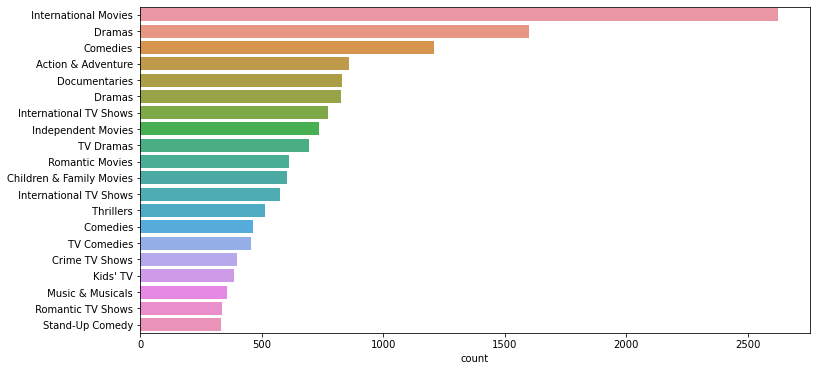

In [75]:
# đồ thị top 20 thể loại movie và tv shows
plt.figure(figsize=(12,6))
sns.countplot(y = genre, order=genre.value_counts().index[:20])
plt.show()